<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Stock_Market_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Analysis Project**

Stock Market Analysis means analyzing the current and historical trends in the stock market to make future buying and selling decisions. Stock market analysis is one of the best use cases of Data Science in finance. Analysizing Current and Historical Trends. Make Future buying and selling decisions.

# **Load Library**

In [1]:
#load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
import google.colab.files as files
uploaded = files.upload()


Saving HDFCBANK.csv to HDFCBANK.csv


In [3]:
#read data set
df = pd.read_csv('HDFCBANK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-06-01,8.05,8.05,8.05,8.05,6.677534,0
1,1995-07-01,8.05,8.05,8.05,8.05,6.677534,0
2,1995-08-01,8.05,8.05,8.05,8.05,6.677534,0
3,1995-09-01,8.05,8.05,8.05,8.05,6.677534,0
4,1995-10-01,8.05,8.05,8.05,8.05,6.677534,0


In [4]:
#round off
df=df.round(2)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-06-01,8.05,8.05,8.05,8.05,6.68,0
1,1995-07-01,8.05,8.05,8.05,8.05,6.68,0
2,1995-08-01,8.05,8.05,8.05,8.05,6.68,0
3,1995-09-01,8.05,8.05,8.05,8.05,6.68,0
4,1995-10-01,8.05,8.05,8.05,8.05,6.68,0


In [5]:
df.shape

(316, 7)

In [6]:
#columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
#chec null values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [8]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [9]:
#convert the date column type to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-06-01,8.05,8.05,8.05,8.05,6.68,0
1,1995-07-01,8.05,8.05,8.05,8.05,6.68,0
2,1995-08-01,8.05,8.05,8.05,8.05,6.68,0
3,1995-09-01,8.05,8.05,8.05,8.05,6.68,0
4,1995-10-01,8.05,8.05,8.05,8.05,6.68,0


In [10]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [11]:
#number of days
df['Date'].max() - df['Date'].min()

Timedelta('9589 days 00:00:00')

In [24]:
#show all column except Date
dff=df.loc[:, df.columns != 'Date']
dff.head()

,Open,High,Low,Close,Adj Close,Volume
0,8.05,8.05,8.05,8.05,6.68,0
1,8.05,8.05,8.05,8.05,6.68,0
2,8.05,8.05,8.05,8.05,6.68,0
3,8.05,8.05,8.05,8.05,6.68,0
4,8.05,8.05,8.05,8.05,6.68,0


In [28]:
#stats for last 90 days
dff.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,881,927,843,893,879,7203020
std,339,357,322,341,346,4697075
min,359,377,353,359,341,154842
25%,543,562,523,550,530,4256541
50%,916,953,868,931,913,6069512
75%,1115,1165,1061,1123,1116,8595267
max,1580,1650,1575,1581,1581,29660043


In [29]:
#set the Date columns as index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-06-01,8.05,8.05,8.05,8.05,6.68,0
1995-07-01,8.05,8.05,8.05,8.05,6.68,0
1995-08-01,8.05,8.05,8.05,8.05,6.68,0
1995-09-01,8.05,8.05,8.05,8.05,6.68,0
1995-10-01,8.05,8.05,8.05,8.05,6.68,0


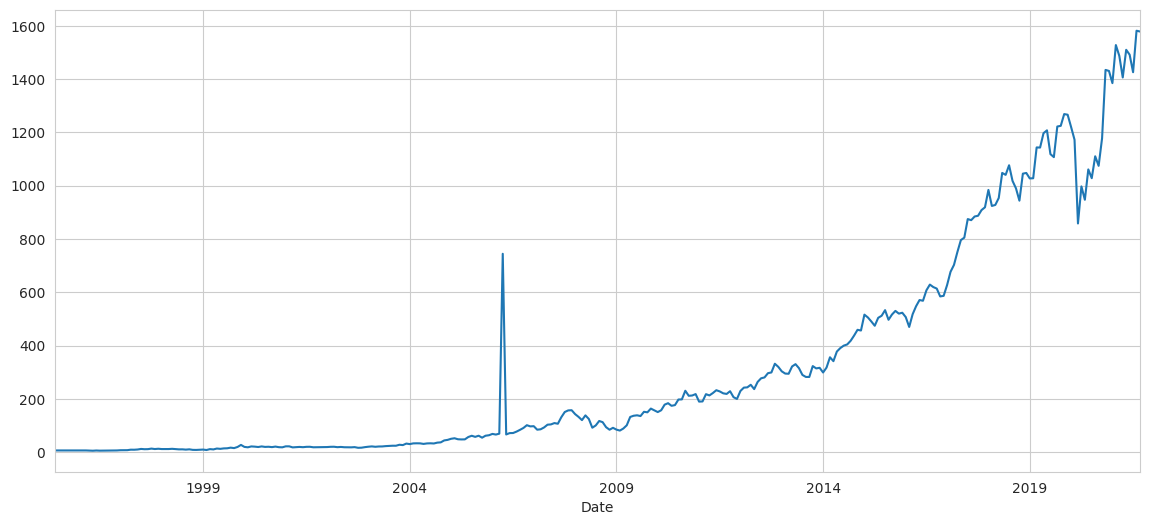

In [33]:
#observe price variation of the closing price
sns.set_style('whitegrid')
df['Adj Close'].plot(figsize=(14,6))
plt.show()

In [36]:
#add a new column 'Day Percentage' which give the daily return
df['Day Percentage'] = df['Adj Close'].pct_change()*100
df.head()


,Open,High,Low,Close,Adj Close,Volume,Day Percentage
Date,,,,,,,
1995-06-01,8.05,8.05,8.05,8.05,6.68,0,NaN
1995-07-01,8.05,8.05,8.05,8.05,6.68,0,0.0
1995-08-01,8.05,8.05,8.05,8.05,6.68,0,0.0
1995-09-01,8.05,8.05,8.05,8.05,6.68,0,0.0
1995-10-01,8.05,8.05,8.05,8.05,6.68,0,0.0


In [37]:
#Replace the NAN the 0
df['Day Percentage'].fillna(0, inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day Percentage
Date,,,,,,,
1995-06-01,8.05,8.05,8.05,8.05,6.68,0,0.0
1995-07-01,8.05,8.05,8.05,8.05,6.68,0,0.0
1995-08-01,8.05,8.05,8.05,8.05,6.68,0,0.0
1995-09-01,8.05,8.05,8.05,8.05,6.68,0,0.0
1995-10-01,8.05,8.05,8.05,8.05,6.68,0,0.0


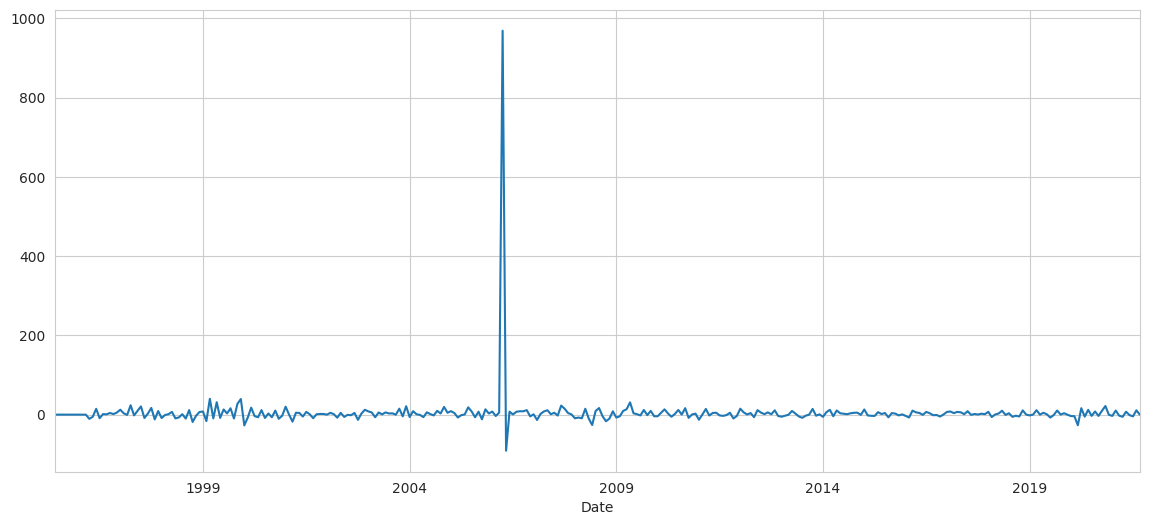

In [38]:
#daily return (day to day percentage change) plot
sns.set_style('whitegrid')
df['Day Percentage'].plot(figsize=(14,6))
plt.show()

In [40]:
#Addd  a new column trend whose values are determined by the below relationship
def treding(x):
  if x>-0.5 and x<0.5:
    return 'Slight or No change'
  elif x>=0.5 and x<1:
    return 'Slight positive'
  elif x>=-1 and x<-0.5:
    return 'Slight negative'
  elif x>=1 and x<3:
    return 'Positive'
  elif x>=-3 and x<-1:
    return 'Negative'
  elif x>=3 and x<7:
    return 'Among top gainers'
  elif x>=-7 and x<-3:
    return 'Among top losers'
  elif x>=7:
    return 'Bull run'
  else:
    return 'Bear drop'

df['Trend']=np.zeros(df['Day Percentage'].count())
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day Percentage,Trend
Date,,,,,,,,
1995-06-01,8.05,8.05,8.05,8.05,6.68,0,0.0,0.0
1995-07-01,8.05,8.05,8.05,8.05,6.68,0,0.0,0.0
1995-08-01,8.05,8.05,8.05,8.05,6.68,0,0.0,0.0
1995-09-01,8.05,8.05,8.05,8.05,6.68,0,0.0,0.0
1995-10-01,8.05,8.05,8.05,8.05,6.68,0,0.0,0.0


In [41]:
df['Trend'] = df['Day Percentage'].apply(treding)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day Percentage,Trend
Date,,,,,,,,
1995-06-01,8.05,8.05,8.05,8.05,6.68,0,0.0,Slight or No change
1995-07-01,8.05,8.05,8.05,8.05,6.68,0,0.0,Slight or No change
1995-08-01,8.05,8.05,8.05,8.05,6.68,0,0.0,Slight or No change
1995-09-01,8.05,8.05,8.05,8.05,6.68,0,0.0,Slight or No change
1995-10-01,8.05,8.05,8.05,8.05,6.68,0,0.0,Slight or No change


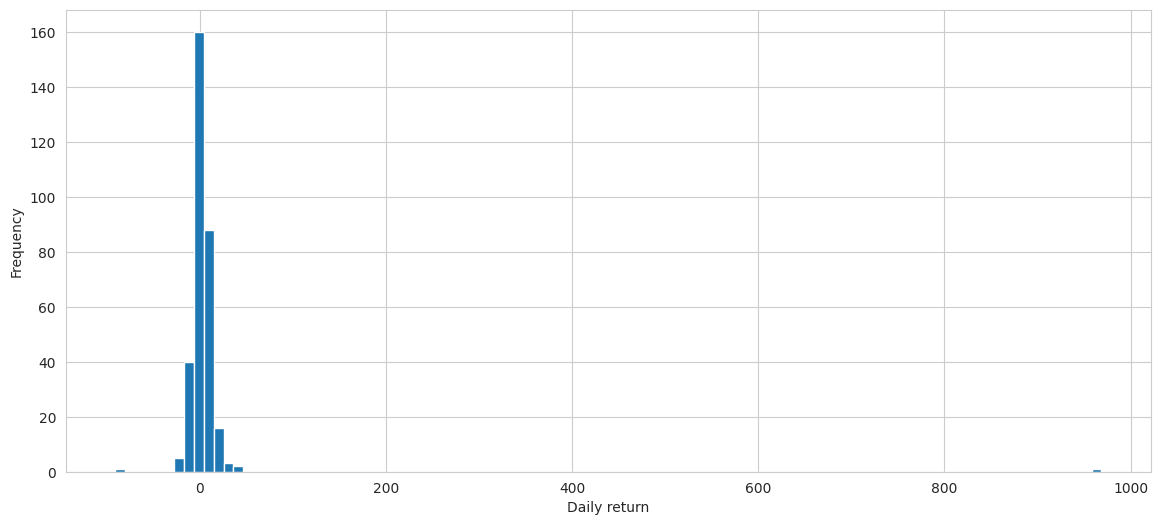

,Day Percentage
count,316.000000
mean,4.921091
std,55.367108
min,-91.045718
25%,-3.121246
50%,1.100200
75%,6.989876
max,968.695278


In [44]:
#Daily return histogram
sns.set_style('whitegrid')
df['Day Percentage'].hist(bins=100, figsize=(14,6))
plt.xlabel('Daily return')
plt.ylabel('Frequency')
plt.show()

#statistic
df['Day Percentage'].describe()

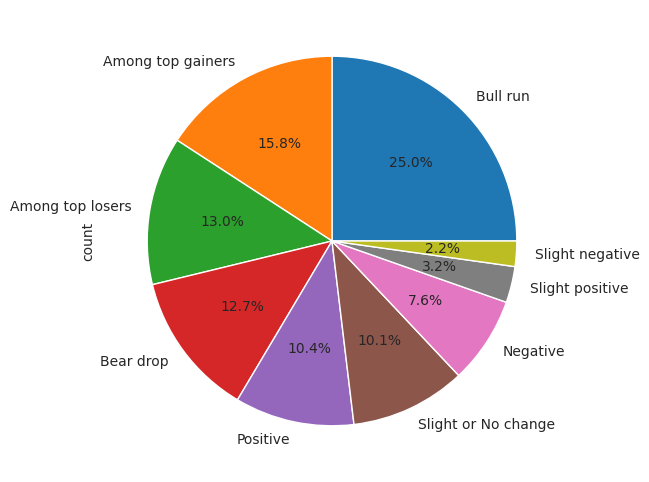

In [46]:
#pie chart of the trend
df['Trend'].value_counts().plot(kind='pie', figsize=(14,6),autopct="%1.1f%%")
plt.show()

In [57]:
dfd=df.index
dfd

DatetimeIndex(['1995-06-01', '1995-07-01', '1995-08-01', '1995-09-01',
               '1995-10-01', '1995-11-01', '1995-12-01', '1996-01-01',
               '1996-02-01', '1996-03-01',
               ...
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=316, freq=None)

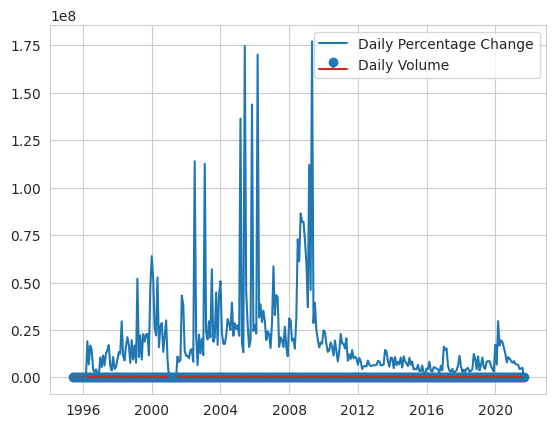

In [58]:
#Superimpose the daily volume plot upon the daily percentage change stem plot
plt.stem(dfd, df['Day Percentage'])
plt.plot(dfd, df['Volume'])
plt.legend(['Daily Percentage Change', 'Daily Volume'])
plt.show()

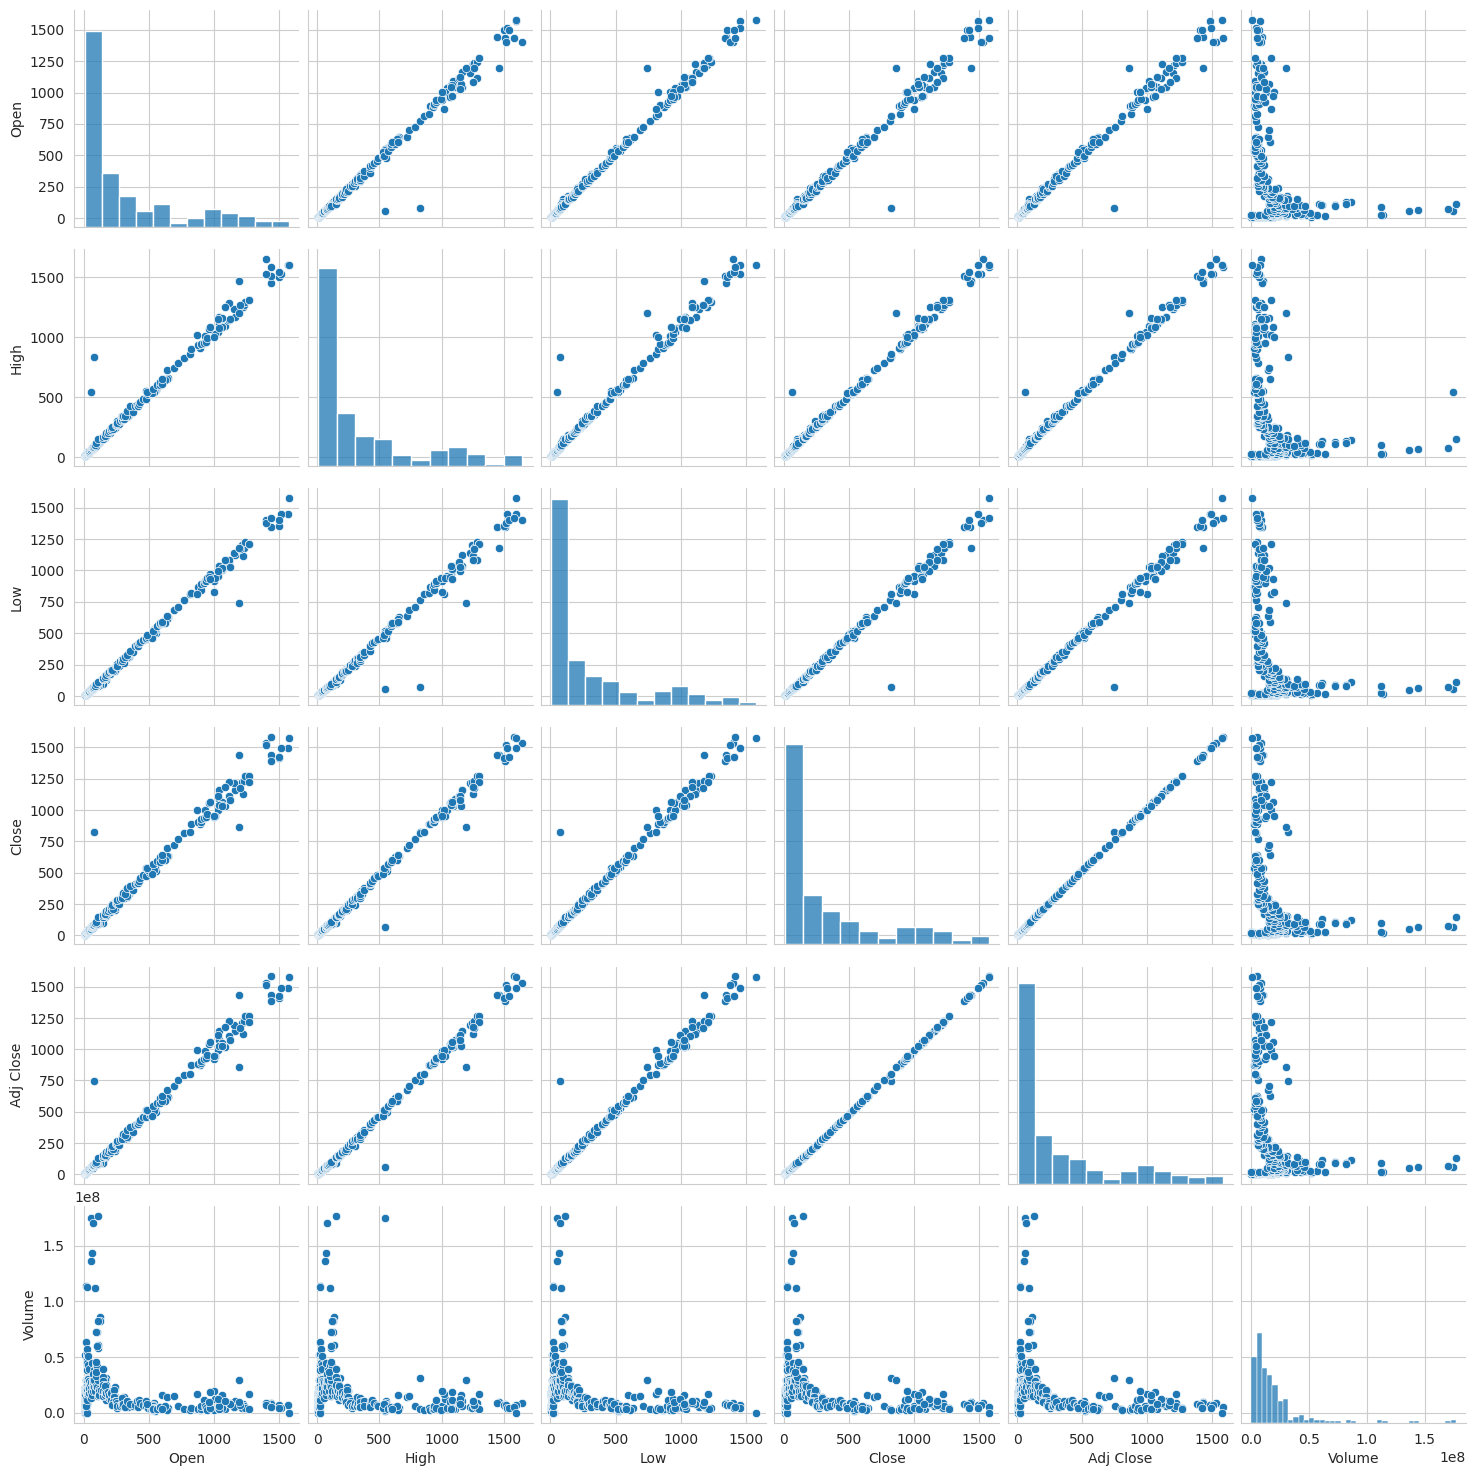

In [59]:
#plot the pair plot of daily percentage
sns.pairplot(dff)
plt.show()